# Hypothesis Testing

Hypothesis testing or significance testing is a method for testing a claim or hypothesis about a parameter in a population, using data measured in a sample. It is generally composed by the following steps:

- it's common to start defining the **null hypothesis** ($H_0$), which represents the simplest case, and initially it is presumed to be true. An **alternative hypothesis** ($H_1$) is a statement that directly contradicts a null hypothesis by stating something that is different to what has been stated in the null hypothesis. The hypotheses $H_0$ and $H_1$ necessarily have to be exclusive, e.g. they cannot be both true.


- subsequently, we set the criteria for a decision by setting the **level of significance** for a test. The level of significance is set by convention at 5% in several scientific fields, but it could also be different (e.g. 10%)


- the key part is to define and calculate the **test statistic**. The test statistics is a properly defined scalar variable that is particularly suitable to quantify, with the observed data, the features that would distinguish the null from the alternative hypotheses.


- the most difficult part, in most of the cases, is to know what is the **distribution of the test statistics**. In few lucky cases (like the examples in this lecture), the pdf of the test statistics is *known in advance*, otherwise it has to be determined, usually by performing pseudo-experiments (again, this works only under certain conditions). 


- the probability of obtaining test result at least as extreme of the value of the test statistics observed, *given that the null hypothesis is true*, is stated by the **p-value**. The p-value is a probability, and as such it varies between 0 and 1 and can never be negative.


- finally, we make a decision about the null hypothesis by using the value of the test statistic that is obtained from the data. The decision is based on the probability of obtaining a certain value, given that the null hypothesis is true. If the p-value is smaller than the level of significance (e.g. 5%), then the decision is to reject the null hypothesis. If the probability is larger, then the decision is to retain the null hypothesis.

### The $Z$ test

The $Z$ test is one of the simplest methods for statistical testing. It has limited applications, as it is applicable only to the cases when the test statistics is approximately **normally distributed** for large samples, and **the variance of the population is known**. If the population variance is unknown (and therefore has to be estimated from the sample itself) or the sample size is not large ($n \lesssim 30$), the Student's t-test (see later) may be more appropriate.

The $Z$ test requires to know in advance:

- the expected value $\mu$ of the test statistics under the null hypothesis

- the standard deviation $\sigma_\mu$ of the test statistics under the null hypothesis

- having determined if the test statistics is one-tailed or two-tailed (depends on the problem)

- choosing the significance level $\alpha$ (usually $0.05$, but could be different)

Then, the test score $Z$ is calculated as:

$$Z = \frac{\bar{x} - \mu}{\sigma_\mu}$$

In this test, the $Z$ score is assumed to follow the standard normal distribution, therefore computing the *p-value* boils down to calculate an integral of the Gaussian function from the observed value $Z$ to $+\infty$.

However, we must pay attention to the fact that if the test statistics is two-tailed, the integral should be performed on the negative tail as well, from $-\infty$ to $Z$.

Once we have calculated the integral(s) and obtained the p-value, we can draw our conclusions: if the p-value is below your significance level $\alpha$, we reject the null hypothesis.



#### Example:

Let's pretend that we want to determine if an object is made of pure gold by measuring its melting point. We know the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C and our measurements have a standard deviation of 3$^{\circ}$C. We take one jewel, and it melts at 1054.7 $^{\circ}$C. We want to know if we should be suspicious about that jewel.

Let's see if we can disprove the null hypothesis (the jewel is made of gold). In this case, it's safe to assume that the temperature measurements are normally distributed and we know the variance; also, the test statistics is two-sided, as the measured temperature can be either larger or smaller than the mean value. The significance level is set to 0.05.

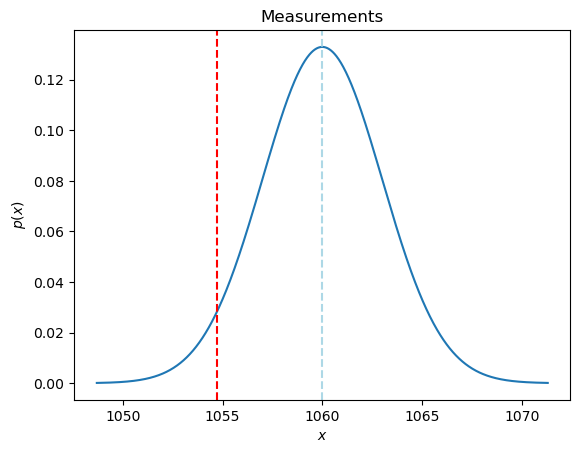

In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0 = 1054.7
mu = 1060.
sigma_mu = 3.

# plot the measurement and its assumed pdf
w = mu - x0
x = np.linspace(mu - w - 6, w + mu + 6, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma_mu)
plt.plot(x, y)
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

Now, we focus on the test statistics and its distribution in order to calculate the p-value.

In this (trivial) example, the test statistics is very similar to the measurement itself (the distribution is a Gaussian centered on 0, width 1, and normalized to 1). It's often not the case: most of the times, the test statistics follows other distributions (see next examples).

Let's calculate the $Z$ score and the p-value using the normal distribution in `scipy.stats.norm`: 

Z = 1.7666666666666515


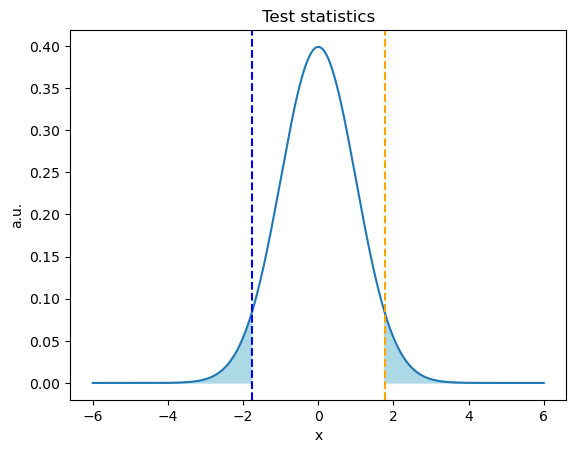

In [6]:
# determine the Z score
Z = abs(x0 - mu) / sigma_mu
print("Z =", Z)

# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

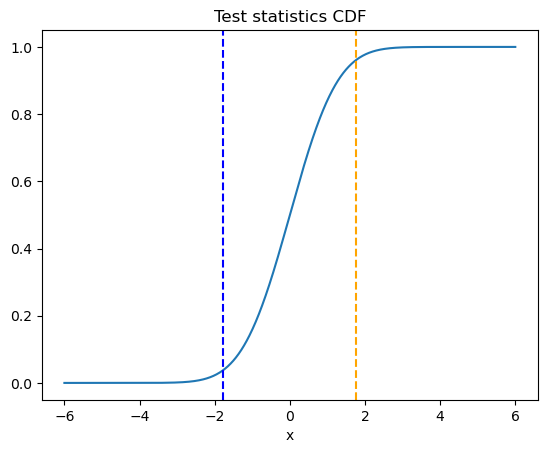

p-value = 0.07728406892559245


In [7]:
# plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

The probability to observe a jewel melting at temperatures smaller than 1054.7$^{\circ}$C or larger than 1065.3$^{\circ}$C is then $\approx 7.7\%$, which is larger than $\alpha$. So we can accept the null hypothesis (the jewel is made of gold).

### Student's $t$-Test

The Student's t-test is a statistical test that is used to compare *the means of two data samples*. In other words, it determines a probability that two populations are the same with respect to the variable tested.

It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or to check if the mean of a distribution significantly differs from the expected value.

The main difference with the $Z$ test is that the expected variance of the sample is unknown.

The t-test is a parametric test of difference, meaning that it makes the same assumptions about the input data samples:

- are independent
- are (approximately) normally distributed
- have a similar amount of variance within each group

If your data does not fit these assumptions, you have to resort to more complex, nonparametric tests.

Since the variance $\sigma^2$ of the data sample is not known a-priori (not to be confused with $\sigma_\mu$, the standard deviation of the expected value in the previous exercise), it is estimated directly from the sample:

$$\sigma^2 = \frac{\sum_i^n (x_i - \bar{x})^2}{n-1}$$

and the test statistics $T$ is defined as:

$$T = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

where $\bar{x}$ is the sample mean of size $n$, and $\mu$ is the population mean or the expected value.

The distribution of the test statistics $T$ given the number of degrees of freedom $ndof = n-1$ is known under the name of **T Student distribution**, and is implemented in SciPy in `scipy.stats.t`.

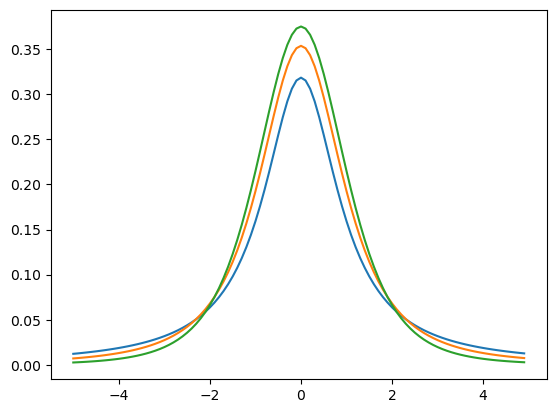

In [8]:
p = np.arange(-5, 5, 0.1)
plt.plot(p, stats.t.pdf(p, df=1))
plt.plot(p, stats.t.pdf(p, df=2))
plt.plot(p, stats.t.pdf(p, df=4))

Knowing the distribution of the test statistics allows to determine the p-value by finding $\int_{-\infty}^{-T} pdf(t)\,dt + \int_{+T}^{+\infty} pdf(t)\,dt$ (in case of double-side p-values).

To be precise, the $t$-test and $Z$-test require:

1. normality of the sample means

2. the $t$-test additionally requires that the sample variance follows a scaled $\chi^2$ distribution

3. the sample mean and sample variance are statistically independent.

By the central limit theorem, sample means of large samples are often well-approximated by a normal distribution even if the data are not normally distributed. For non-normal data, the distribution of the sample variance may deviate substantially from a $\chi^2$ distribution, but the if the sample size is large, Slutsky's theorem implies that the distribution of the sample variance has little effect on the distribution of the test statistic.

#### Example:

In a similar same case as in the previous example, we have some jewels, all of the same material, and we want to verify that they are made of gold by measuring the melting temperature. All we know is that the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C; we don't know the standard deviation.
A person brings in 6 samples and they melt at 1035, 1050, 1020, 1055, and 1046$^{\circ}$C. Should we reject the null hpyothesis (they are made of gold)?

T = -3.012727666381777


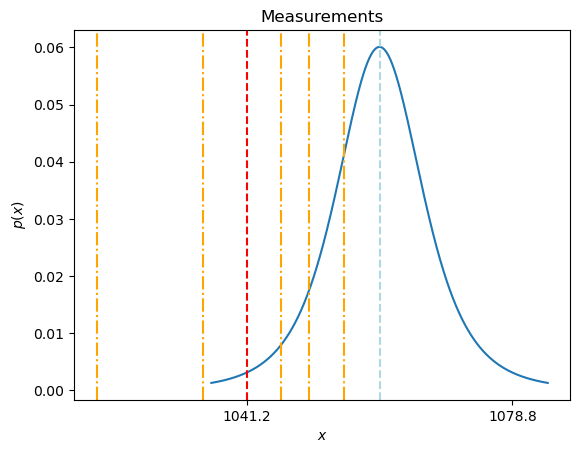

In [9]:
# input data
samples = np.array([1035., 1050., 1020., 1055., 1046.])

# calculate the variance and its sqrt()
sigma = np.sqrt(np.var(samples, ddof=1))

# set the input data
sample_mean = np.mean(samples) # mean of the sample (which is different from mu)
mu = 1060. # the expected value for the mean
n = len(samples) # the size of the data sample
w = mu - sample_mean

# calculate the test statistics
T = (sample_mean - mu) / (sigma / np.sqrt(n))
print("T =", T)

# plot the measurents
x = np.linspace(mu - w - 5, w + mu + 5, 1000)
y = stats.t.pdf(x, loc=mu, scale=sigma / np.sqrt(len(samples)), df=len(samples) - 1)
plt.plot(x, y)
plt.axvline(sample_mean, linestyle='--', color='red')
for l in samples:
    plt.axvline(l, linestyle='-.', color='orange')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.xticks([mu - w, mu + w], [mu - w, mu + w])
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()
# note that this is NOT a plot of the test statistics! This is a plot of the measurements

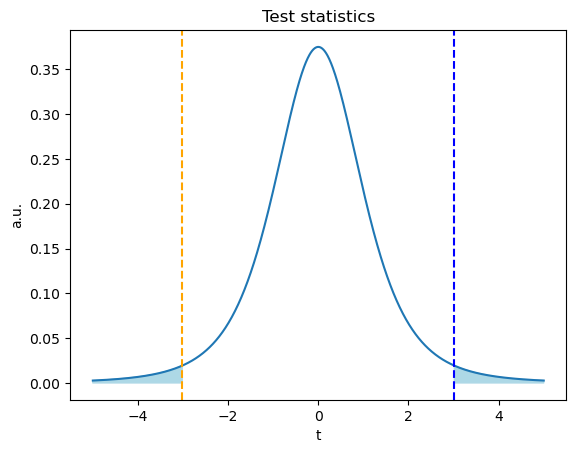

p-value = 0.039444324610338616


In [10]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

Since the p-value is $< \alpha$, we reject the null hypothesis (although with a small margin).

# Linear Regression

We have some data, $x$ and $y$, and we suppose there is a linear relation between them.
Thus, we want to fit a line to the data. Our model will be:

$$\hat{y} = \hat{\alpha} + \hat{\beta}x$$

where the symbol $\hat{}$ indicates our best estimate of that parameter.

For the sake of clarity, we define the following symbols:

* $\alpha$: the intercept
* $\hat{\alpha}$: our estimated best intercept
* $\beta$: the slope
* $\hat{\beta}$: our estimated best slope
* $\hat{y}$: our estimated y's, or in other words $f(x, \hat{\alpha}, \hat{\beta})$
* $x,y$: the data
* $\bar{x}$, $\bar{y}$: the average of $x,y$
* Residual: the difference between $\hat{y}$ and $y$ at a particular point ($\hat{y}_i - y_i$)
* Sum of squared residues (SSR): $\sum_i (\hat{y}_i - y_i)^2$
* Total sum of squares (TSS): $\sum_i (\bar{y} - y_i)^2$, which is a kind of variance

One way to view this problem is as a minimization. Specifically, we want to have a function that returns a value of how good the estimate of our parameters is. As a matter of fact, our ultimate goal is to make $\hat{y}$ as close as possible to $y$. One of the most immediate choices is to take $\sum_i(y_i - \hat{y}_i)^2$, and minimize the resulting quantity. 
So we need to write down a function which takes in $\hat{\alpha}$ and $\hat{\beta}$ and returns how good the fit is:

$$f(\hat{\alpha}, \hat{\beta}) = \sum_i \left(y_i - \hat{\alpha} - \hat{\beta} x_i\right)^2$$

We can minimize this equation using any of our minimization techniques or we can do it analytically. In case of a linear regression, this can be easily done analytically.

Using calculus you can show that the minimum to $f(\alpha, \beta)$ is:

$$\hat{\beta} = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2}$$

With a little bit more algebra, you can show this is

$$\hat{\beta} = \frac{\sigma_{xy}}{\sigma_x^2}$$

where $\sigma_{xy}$ is the sample covariance of $x$ and $y$ and $\sigma_x^2$ is the sample variance of $x$.

To find the intercept, you can just take the average of the residuals (not their squares!) given the model so far:

$$\hat{\alpha} = \frac{1}{N}\sum_i (y_i - \hat{\beta}x_i)$$

The uncertainties of $\hat{\alpha}$, $\hat{\beta}$ can be derived as well, but they strongly depend on the assumptions that you do on the uncertainties of the single points.


Under the assumption that the data points are normally distributed with mean $\hat{\beta}$ and variance $\sigma^2 / \sum (x_i - \hat{x})^2$, where $\sigma^2$ is the variance of the error terms, the uncertainties on the parameters $\alpha$ and $\beta$ can be derived as:

$$\sigma_\hat{\beta}^2 = \frac{\frac{SSR}{n-2}}{\sum (x_i - \bar{x})^2}$$

$$\sigma_\hat{\alpha}^2 = \sigma_\hat{\beta}^2 \frac{\sum x_i^2}{n}$$

Note that if you have a prior on the uncertainty on the single points, these uncertainties will not be valid and should be updated with the single point uncertainty terms!

Let's see the regression in action:

In [ ]:
# generate some data with a linear relation + add some random noise
np.random.seed(123456)
x = np.linspace(0, 10, 20)
y = 10 + 2.5*x + 1.5*np.random.normal(scale=2, size=20)

# get the covariance. Numpy conveniently provides the np.cov() method
cov = np.cov(x, y, ddof=2)
b_hat = cov[0, 1] / cov[0, 0]
a_hat = np.mean(y - b_hat * x)

n = len(x)
ssr = np.sum((y - (a_hat + b_hat * x))**2)
sigma_b = np.sqrt( (ssr/(n-2)) / np.sum((x - np.mean(x))**2) )
sigma_a = np.sqrt( sigma_b**2 * np.sum(x**2) / n )

print("fitted alpha = %.2f +- %.2f" % (a_hat, sigma_a))
print("fitted beta  = %.2f +- %.2f" % (b_hat, sigma_b))
print("covariance:\n", cov)

# plot resulting line
plt.plot(x, y, 'o')
plt.plot(x, a_hat + b_hat * x)
plt.show()

Notice that we didn't get exactly the correct answer: the points were generated with a slope of 2.5 and an intercept of 1, whereas our fit was a little bit off. But taking into account the uncertainties on the parameters, we can see that they are compatible with the initial values.

## Goodness of Fit

Every time a regression or a fit is performed, the so-called *goodness of fit* should be evaluated as well, in order to asses whether the function chosen fits well the data. Two common methods are:

### The linear correlation coefficient

One viable and quick way is to just compute the SSR, which stands for *sum of the squared residuals*. However, the SSR has the downside that it depends on the unit of $y$. Therefore, it's a good idea to divide the SSR by the TSS (*total sum of squares*), which has the same unit, so the result is a pure number:

$$R^2 = 1 - \frac{\textrm{SSR}}{\textrm{TSS}} = 1 - \frac{\sum_i \left(\hat{y}_i - y\right)^2}{\sum_i \left(\bar{y} - y\right)^2}$$

This equation has the property that it is unitless, and it is $1$ when the fit is "perfect" (all data points sit on top of the fitted funtion), and $0$ when the fit does not describe the data at all. In the case of linear regression, $R$ is the same as the correlation coefficient.

In the case of the previous fit:

In [ ]:
ssr = np.sum((y - a_hat - b_hat * x)**2)
tss = np.sum((np.mean(y) - y)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) # check with the correlation matrix that R is the correlation coefficient

### The $\chi^2$

A proper goodness-of-fit test involves more than just some simple numerical estimator. The **$\chi^2$ goodness of fit test** is used to determine whether the sample data is consistent with a hypothesized distribution (in this case, a linear dependence, but it works for all data models). The $\chi^2$ goodness of fit test is appropriate when the data is **randomly distributed**, and the number of observations is not small, e.g. $\geq 5$.

In order to perform the test, we need to:

- choose the **test statistics** (a figure of merit of how "good" the fit is), which in this case is $\chi^2$, defined as:
$$\chi^2 = \sum_i \frac{(y_i - \hat{y}_i)^2}{\sigma_{y_i}^2}$$
where $\sigma_{y_i}$ is the uncertainty associated to the $i$-th data point


- determine the number of degrees of freedom of the fit, which is the number of data points - 1


- determine the **p-value**, which is the probability of observing a sample statistic as extreme or more as the test statistic.

The $\chi^2$ as test statistics is a good choice, because it has a known distribution given the number of degrees of freedom and under the assumption that the data is randomly distributed.

Thus, the p-value is the integral of the $\chi^2$ from the value returned from the fit to $+\infty$. When no scientific libraries were available, these values were tabulated, but nowadays `scipy.stats` provides a lot of these functions (including their cumulative distribution functions, which allow to quickly calculate the integral):

In [ ]:
p = np.arange(0, 40, 0.1)
plt.plot(p, stats.chi2.pdf(p, df=4)) # very small p-value: model likely doesn't fit data
plt.plot(p, stats.chi2.pdf(p, df=8))
plt.plot(p, stats.chi2.pdf(p, df=12)) # very large p-value:

In the previous example, let's now assume (in order to use the $\chi^2$) that the data represents counts, whose uncertainty is known from the Poisson pdf and are simply $\sigma_{y_i} = \sqrt{y_i}$:

In [ ]:
sigma_y = np.sqrt(np.abs(y)) # assume random counts, e.g. sigma_i = sqrt(y_i). This is not always the case!

plt.errorbar(x, y, yerr=sigma_y, fmt='.k') # use plt.errorbar to plot points with the corresponding uncertainties

In [ ]:
# set the number of degrees of freedom
ndof = len(x) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
chi2 = np.sum(((y - (a_hat + b_hat * x))**2) / sigma_y)
print("chi2 =", chi2)

In [ ]:
ts = stats.chi2.pdf(p, df=ndof)
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics")
plt.axvline(chi2, color='red')
plt.fill_between(p, ts, where=(p > chi2), color='lightblue')

In [ ]:
plt.plot(p, stats.chi2.cdf(p, df=ndof))
plt.title("$\chi^2$ test statistics CDF")
plt.axvline(chi2, color='r')

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

 - A p-value $> \alpha$ means that we are not able to reject the null hypothesis (our model represents the data), thus we cannot conclude that the fit functions is wrong.
 
 - A p-value $< \alpha$ means that we reject the null hypothesis, therefore our fit function does not represents the data and the fit is not satisfactory.

# Curve Fitting

Unfortunately, not all datasets have a linear dependence like the ones we have seen before. Often, there is a more complicated function that needs to be fitted to the data. In these cases, you may:

1) apply an appropriate transform to the data to get back to the linear regression case (if applicable), or

2) perform a full fit with the desired function to the data

In this example, we will see how to do the latter. Be aware that there are more than one test statistics that can be chosen (it could be simply $\sum (\hat{y}_i - y_i)^2$, or the $\chi^2$, Likelihood, ...).

The best estimate of the function parameters are then determined through the numerical minimization of the test statistics.

Let's create some data, sampled from a sine distribution and affected by random noise:

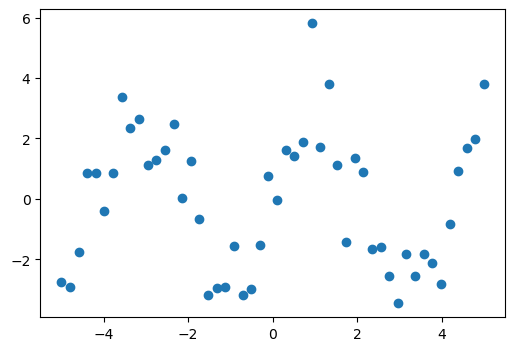

In [5]:
# set the input data
A = 2.9
f = 1.5

# create the dataset
x_data = np.linspace(-5, 5, num=50)
y_data = A * np.sin(f * x_data) + np.random.normal(size=50)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

This case is very straightfoward, because we *know* that the data is sampled from a sine function.

To find the original sine function parameters (the amplitude and (angular) frequency), we can call the `optimize.curve_fit()`, which accepts as arguments the fitting function, the data, and [much more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

In [6]:
from scipy import optimize

def f(x, A, nu):
    return A * np.sin(nu * x) # sine function with amplitude A and angular frequency

# fit by means of curve_fit
# p0 is a list of the initial guessed values for the parameters
popt, pcov = optimize.curve_fit(f, x_data, y_data, p0=[2, 2], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))

parameters:
 [2.81983487 1.49192674]
covariance matrix:
 [[ 0.04821247 -0.00057363]
 [-0.00057363  0.00063313]]
A = 2.82 +- 0.22
f = 1.49 +- 0.03


Note: the way `curve_fit()` determines the uncertainty is to actually renormalize the errors so that the reduced $\chi^2$ (that is, the $\chi^2$/number of degrees of freedom) value is one, so the magnitude of the errors doesn't matter, only the relative errors. In some cases, when you have a prior on your uncertainites, you can specify `absolute_sigma=True` and pass an appropriate array containing the uncertainties in order to preserve the original errors.

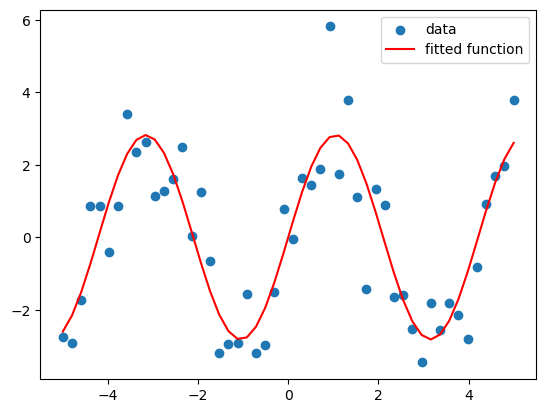

In [7]:
plt.scatter(x_data, y_data, label='data')
plt.plot(x_data, f(x_data, popt[0], popt[1]), color='red', label='fitted function')
plt.legend(loc='best')

## The choice of the function

Fitting is one of the crucial points of data analysis or in general data science. If you *know* the underlying model, then the overall problem is simple; if you don't, then it is a very delicate issue.

In some lucky cases, your data is distributed according to a known relation (a linear dependence on time, or the exponential decrease of a certain count) you can infer from your knowledge of the problem you are dealing with.

In all other cases, you don't know which function should be used for fitting, because you don't have the full knowledge of the underlying problem. In order to find a function, a common practice is to proceed by trial-and-error, although this poses several problems such that the choice of the function is arbitrary, and there is the risk to over/under-fit the data.

In [ ]:
from IPython.display import Image
Image(filename = 'images/xkcd_curve_fitting.png') 

### The Fisher F-test

The method called **Fisher F-test** [[1](http://EconPapers.repec.org/RePEc:bla:istatr:v:80:y:2012:i:3:p:491-491)] [[2](https://doi.org/10.2307/2340521)] can help to determine the correct number of parameters in an appropriate family of functions (e.g. polynomials, exponentials, ...). From the statistical point of view, this method is not trivial at all because you need a prior on the choice of the function.

Please note that if you don't even have the knowledge of which family of functions to be used to fit the data, then the problem is more complex and the F-test is not applicable.

But, if you have a prior on the family of the function but not the exact number of parameters, the Fisher F-test provides an useful recipe.

The F-test is based on some fit quantities, such as the RSS (squared sum of the residuals of the fit, or $\sum_i (\hat{y}_i - y_i)^2$) and the number of degrees of freedom.

The test uses these quantities to iteratively compare one reference function (with $SSR_1$ and $n_1$ degrees of freedom) and the function with one more parameter (with $SSR_2$ and $n_2$) to **determine whether or not the additional parameter is needed**.

If the simpler fit function is correct, the relative increase in the sum of squares is expected to be smaller than the relative increase in DOF:

$$\frac{SSR_1 - SSR_2}{SSR_2} \lesssim \frac{n_1 - n_2}{n_2}$$

the F-test is based on the test statistics $F$ that is defined as follows:

$$F = \left( \frac{SSR_1 - SSR_2}{n_2 - n_1} \right) / \left( \frac{SSR_2}{N - n_2} \right)$$

which has a known pdf, named *Fisher distribution*, which is nothing less than the ratio of two $\chi^2$ distributions. The Fisher distribution is implemented in `scipy.stats.f`.

The value $F$ is used to calculate a p-value after integrating the Fisher distribution from $F$ to $+\infty$, with $N$ the number of total degrees of freedom:

$$p-value = \int_F^{+\infty} \mathcal{F} d\mathcal{f}$$

- If the p-value $> \alpha$, the null hypothesis (the fit with the simpler function) cannot be rejected, therefore the simpler function is considered sufficient to model the data.

- If the p-value $< \alpha$, the null hypothesis is rejected, therefore a function with more parameters is needed. In this case, the Fisher test is repeated by increasing the number of parameters of both functions, until a function with a sufficient number of parameters is found.

SSR: 473.2946503791915 85.46009025125663 83.7778887477544
Test Linear vs Quadratic:
p-value: 0.000 , additional parameter necessary: YES
Test Quadratic vs Cubic:
p-value: 0.166 , additional parameter necessary: NO


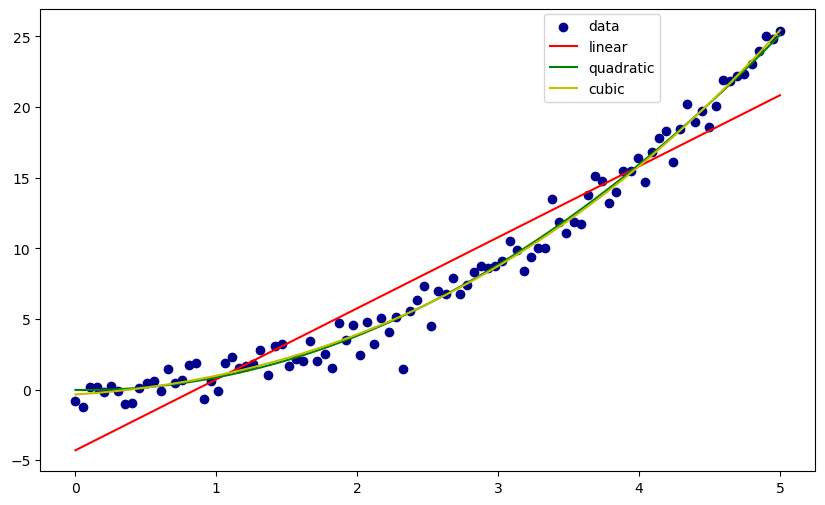

In [8]:
# define alpha
alpha = 0.05 # note that alpha could also be 0.10

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

# generate data according to a certain distribution + random noise
N = 100
x = np.linspace(0, 5., N)
rnd = np.random.normal(size=(N))
y = x**2 + rnd

# plot
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=x, y=y, marker='o', c='darkblue', label="data")

# define fitting functions
def f1(x, a0, a1):
    return a0 + a1 * x

def f2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

def f3(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

(fa0, fa1), cov = optimize.curve_fit(f1, x, y)
y1 = f1(x, fa0, fa1)
ax.plot(x, y1, color='r', label="linear")
ssr_1 = np.sum((y1 - y)**2)
ndof_1 = 2 - 1 # n of parameters - 1

(fa0, fa1, fa2), cov = optimize.curve_fit(f2, x, y)
y2 = f2(x, fa0, fa1, fa2)
ax.plot(x, y2, color='g', label="quadratic")
x
ndof_2 = 3 - 1 # n of parameters - 1

(fa0, fa1, fa2, fa3), cov = optimize.curve_fit(f3, x, y)
y3 = f3(x, fa0, fa1, fa2, fa3)
ax.plot(x, y3, color='y', label="cubic")
ssr_3 = np.sum((y3 - y)**2)
ndof_3 = 4 - 1 # n of parameters - 1

ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2, ssr_3)

# run F-test
# test f2 vs f1
print("Test Linear vs Quadratic:")
pval_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N, verbose=True)

print("Test Quadratic vs Cubic:")
pval_2_vs_3 = Ftest(ssr_2, ssr_3, ndof_2, ndof_3, N, verbose=True)

## Interpolation

If you only need to *evaluating intermediate points* where no measure exists, **interpolation** is a much more agile technique that allows that **without performing any fit**.

Interpolation is implemented in the `scipy.interpolate` module, which provides a Python wrapper of the FITPACK Fortran subroutines.

There are multiple kinds of interpolation, which should be specified: linear is the default;  *zero*, *slinear*, *quadratic* and *cubic* refer to a [spline](https://en.wikipedia.org/wiki/Spline_(mathematics)) interpolation of zeroth, first, second or third order; *previous* and *next* simply return the previous or next value of the point.

In [ ]:
# the actual measurements
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1.e-1
measures = np.sin(2 * np.pi * measured_time) + noise

# import scipy.interpolate
from scipy.interpolate import interp1d
# 1D linear interpolation
linear_interp = interp1d(measured_time, measures)
# cubic interpolation
cubic_interp = interp1d(measured_time, measures, kind='cubic')

# denser interval to plot the interpolating function
interpolation_time = np.linspace(0, 1, 50)

plt.figure(figsize=(6, 4))
# plot analytic function
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
# plot linear interpolation
linear_results = linear_interp(interpolation_time)
plt.plot(interpolation_time, linear_results, label='linear interp')
# plot cubic interpolation
cubic_results = cubic_interp(interpolation_time)
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()

# checking the interpolation results in one point
x = 0.2
print("sin(", x, "):", np.sin(2 * np.pi * x), "\n",
       "linear prediction:",linear_interp(x), "\n",
       "cubic prediction:", cubic_interp(x))